In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from scipy.io import loadmat, savemat

In [116]:
rock = np.load('por_perm_facies_1000x128x128.npz')
poro, perm, facies = rock['poro_norm'], rock['perm_norm'], rock['facies_norm']
poro = np.flip(np.rot90(poro, 3, axes=(1,2)), axis=2)
perm = np.flip(np.rot90(perm, 3, axes=(1,2)), axis=2)
facies = np.flip(np.rot90(facies, 3, axes=(1,2)), axis=2)
print('Poro: {} | Perm: {} | Facies: {}'.format(poro.shape, perm.shape, facies.shape))

inj_idx = [[63], [63]]
prod_idx = [[0, 0, 127, 127], [0, 127, 0, 127]]

Poro: (1000, 128, 128) | Perm: (1000, 128, 128) | Facies: (1000, 128, 128)


In [164]:
nx, ny, nz = 128, 128, 1
nr, nt, nw = 100, 40, 4

saturation = np.zeros((nr,nt,nx,ny))
pressure = np.zeros((nr,nt,nx,ny))
wellsol = np.zeros((nr,nt,nw,3))
timesteps = np.zeros((nt,1))

for i in range(nr):
    states = loadmat('results/states/states_{}.mat'.format(i+1), simplify_cells=True)['states']
    for t in range(nt):
        saturation[i,t] = states[t]['s'][:,1].reshape(nx,ny)
        pressure[i,t] = states[t]['pressure'].reshape(nx,ny)

        for w in range(nw):
            wellsol[i,t,w,0] = -states[t]['wellSol'][w+1]['qOr'] * (3.28084**3) / 5.615 * (60*60*24)
            wellsol[i,t,w,1] = -states[t]['wellSol'][w+1]['qWr'] * (3.28084**3) / 5.615 * (60*60*24)
            wellsol[i,t,w,2] = states[t]['wellSol'][w+1]['wcut']

for t in range(nt):
    timesteps[t] = states[t]['time'] / (60*60*24*365.25)

In [173]:
sample = 92

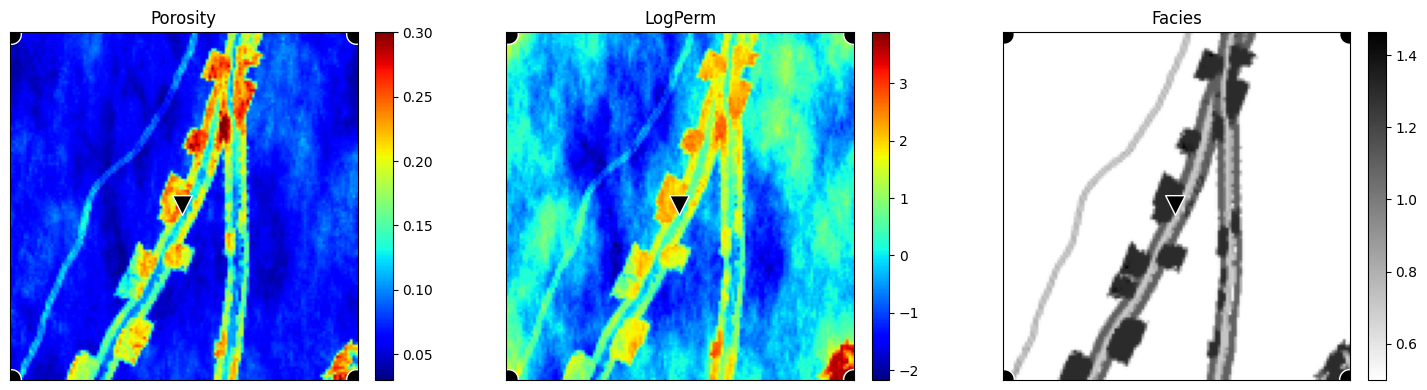

In [174]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
ax1, ax2, ax3 = axs

im1 = ax1.imshow(poro[sample], cmap='jet')
im2 = ax2.imshow(perm[sample], cmap='jet')
im3 = ax3.imshow(facies[sample], cmap='binary')

[a.scatter(inj_idx[0], inj_idx[1], color='k', marker='v', edgecolor='w', s=200) for a in axs]
[a.scatter(prod_idx[0], prod_idx[1], color='k', marker='o', edgecolor='w', s=200) for a in axs]
[plt.colorbar(ii, ax=a, pad=0.04, fraction=0.046) for ii, a in zip([im1, im2, im3], axs)]
[a.set(title=['Porosity', 'LogPerm', 'Facies'][i]) for i, a in enumerate(axs)]
[a.set(xticks=[], yticks=[]) for a in axs]
plt.tight_layout()
plt.show()

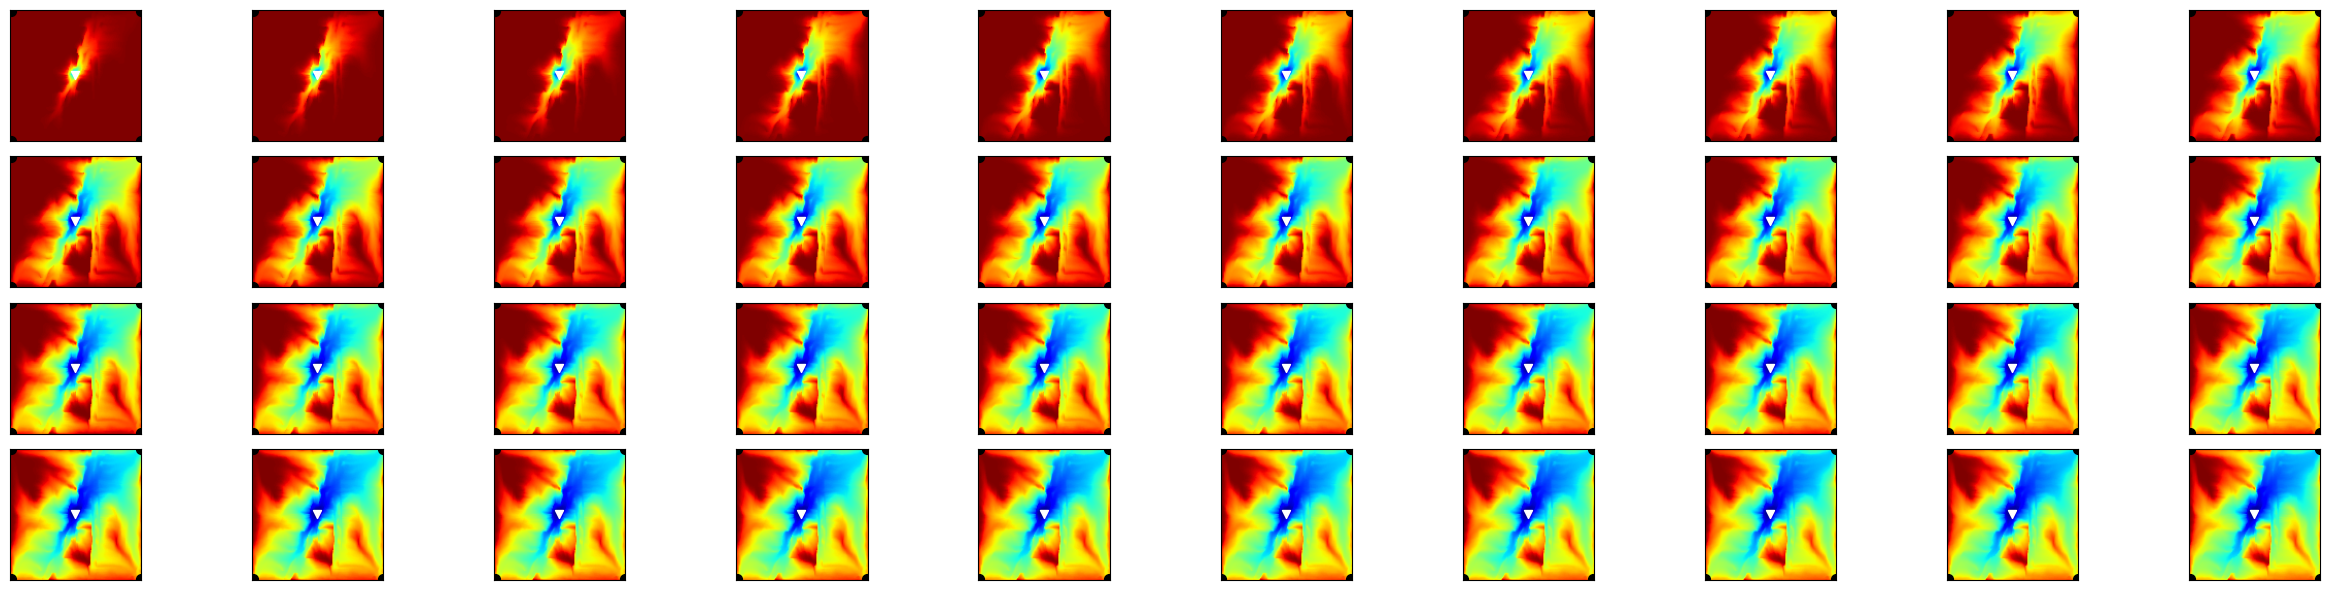

In [175]:
plt.figure(figsize=(25,6))
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.imshow(saturation[sample, i], cmap='jet')
    plt.scatter(inj_idx[0], inj_idx[1], color='w', marker='v', s=33)
    plt.scatter(prod_idx[0], prod_idx[1], color='k', marker='o', s=50)
    plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()

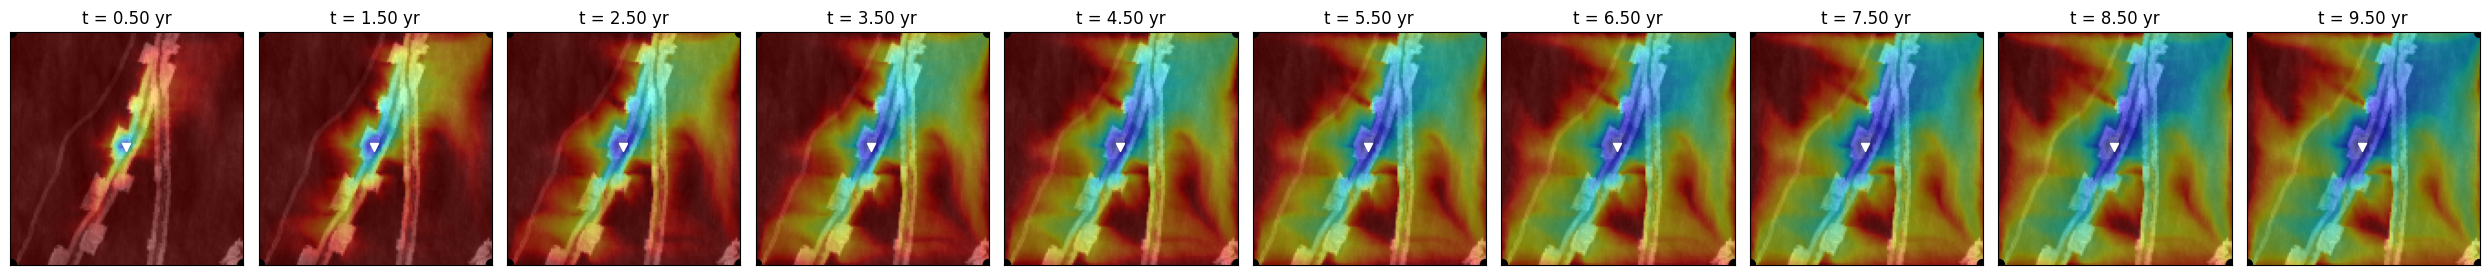

In [176]:
fig, axs = plt.subplots(1, 10, figsize=(25, 4), sharex=True, sharey=True)
for j in range(10):
    k = j * 4 + 1
    axs[j].imshow(poro[sample], cmap='gray')
    axs[j].imshow(saturation[sample, k], cmap='jet', alpha=0.5)
    axs[j].scatter(inj_idx[0], inj_idx[1], color='w', marker='v', s=33)
    axs[j].scatter(prod_idx[0], prod_idx[1], color='k', marker='o', s=50)
    axs[j].set(title='t = {:.2f} yr'.format(timesteps[k][0]), xticks=[], yticks=[])
plt.tight_layout()
plt.show()

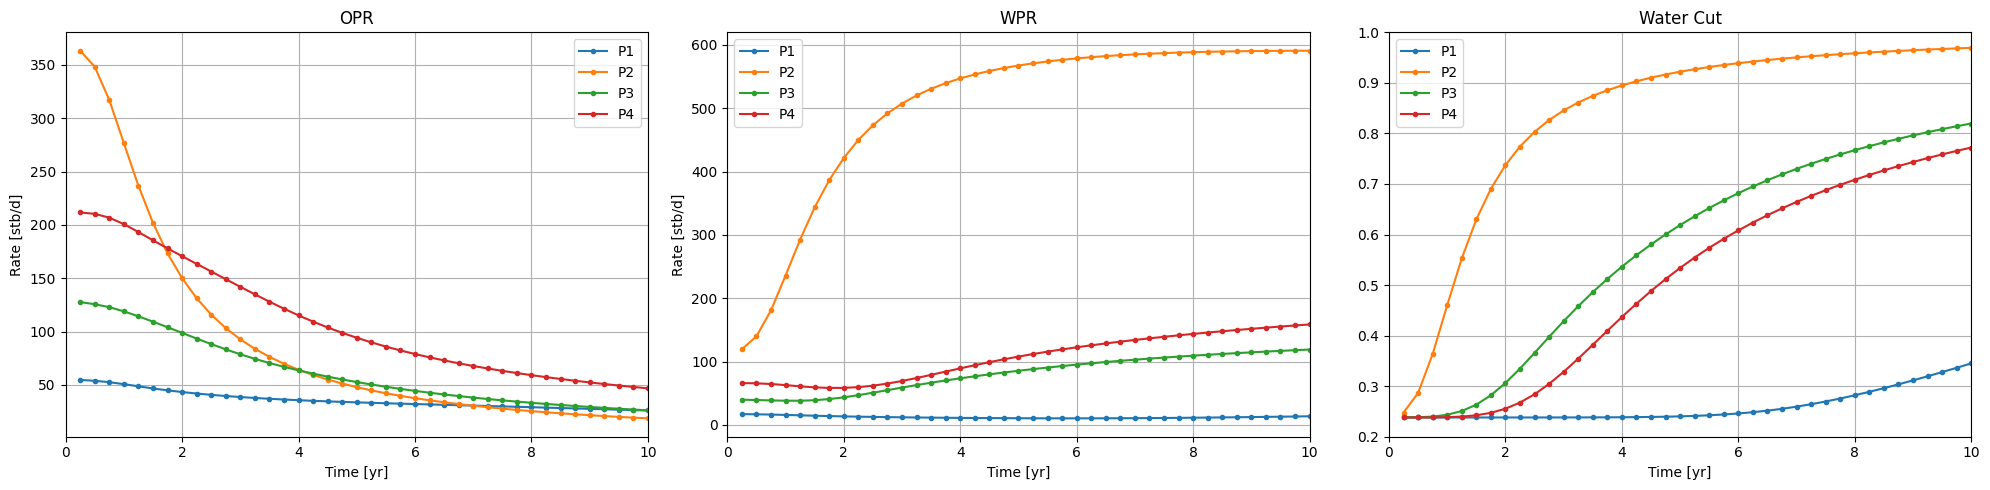

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True)
for i in range(3):
    for j in range(nw):
        axs[i].plot(timesteps, wellsol[sample,:,j,i], label='P{}'.format(j+1), color='C{}'.format(j), marker='.')
    axs[i].grid(True, which='both')
    axs[i].set(title= ['OPR', 'WPR', 'Water Cut'][i], xlabel='Time [yr]', ylabel='Rate [stb/d]' if i<2 else None)
    axs[i].set(xlim=(0,10), ylim=(0.2,1) if i==2 else None)
    axs[i].legend()
plt.tight_layout()
plt.show()

***
# END